<a href="https://colab.research.google.com/github/trivedidn/BNFO301_Trivedi_Disha/blob/main/WPGMA_Parts3and4_Disha%20Trivedi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BNFO301 Assignment Hammings Distance (WPGMA part 3, steps 5-9 and bonus) </h1>

### NOTE: You will have two days to complete Part 3.  Please try to complete steps 5 and 6 today.  This will be the most difficult part of the assignment.

In this assignment, you will be tasked with writing a program that infers a phylogenetic tree usig WPGMA. WPGMA (Weighted Pair Group Method with Arithmetic Mean) is a simple method of creating phylogenies. As the name implies, it creates phylogenies by pairing off sequences (or sequence groups) based on similarity, until a single group remains.

WPGMA requires a few components:
* Multiple sequence aligment (provided)
* Phylip reader
* string distance function (hamming)
* initial distance matrix builder (applies distance function to aligned sequences)
* tree builder
* function to reduce the distance matrix
* function to find cell containing minimum distance



Today, you will create functions to read in the data and calculate hamming distances


Grading (for part 3) 

Attendance = 6 points

Step 5 = 4 points

Step 6 = 4 points

Step 7 = 2 points

Step 8 = 2 points

Step 9 = 2 points

###Please, run each box before begining steps 5 and 6



### Setup
Retrieve the Data File and import dependencies

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os.path
# Load the genbank file 
DATA_FILE_GITHUB = "https://raw.githubusercontent.com/vinaykbansal/data/main/cytochrome_c.phylip"
DEFAULT_FILE_NAME = 'cytochrome_c.phylip'

fileName = DEFAULT_FILE_NAME
#Does the file exists locally, if not get it from the github
if not os.path.exists(fileName):
  #Load the file from Github to the local folder
  !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB
   
print("Reading file:", fileName)

# Read in the string from the file
with open(fileName, "r") as myfile:
    file_input = myfile.read()

--2022-03-31 17:02:24--  https://raw.githubusercontent.com/vinaykbansal/data/main/cytochrome_c.phylip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1364 (1.3K) [text/plain]
Saving to: ‘cytochrome_c.phylip’

cytochrome_c.phylip 100%[===================>]   1.33K  --.-KB/s    in 0s      

2022-03-31 17:02:24 (47.8 MB/s) - ‘cytochrome_c.phylip’ saved [1364/1364]

Reading file: cytochrome_c.phylip


###Step 1 (Day 1)
###Create function to Load the PHYLIP Formated data and save the data to dictionary

You will need a function for loading sequences from a file. In this case, the sequences will be stored in a file format common to phylogenetics, called PHYLIP. You will need to store the information in dictionary, with the sequence names as the keys.

###PHYLIP format:

name1_with_no_white_space SEQUENCE1_WITH_NO_WHITESPACE_AND_NO_TEXT_WRAP 

name2_with_no_white_space SEQUENCE2_WITH_NO_WHITESPACE_AND_NO_TEXT_WRAP 

name3_with_no_white_space SEQUENCE3_WITH_NO_WHITESPACE_AND_NO_TEXT_WRAP

###PHYLIP Example:

FISH ATAGATA

CAT ATCGAAT

DOG ATCGAAT

NOTE:  For the purposes of this assignment, there are no gaps in the alignment provided.  Your code does not need to account for gaps.


HINT: Because of the simple format provided by PHYLIP, you can use the split function to easily parse your data.  Do not forget to return your dictionary.  




In [3]:


#Function needed to load the file to a dictionary with names and sequences
def LoadPhylip(filepath):  
    fh = open(filepath, "r")
    data = fh.readlines()
    fh.close()

    sequences = {}
    for line in data:
        header, sequence = line.split()
        sequences[header] = sequence
    return sequences

#Loading the sequence and printing it
sequences = LoadPhylip(DEFAULT_FILE_NAME)

print(sequences)

{'human': 'MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE', 'horse': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFTYTDANKNKGITWKEETLMEYLENPKKYIPGTKMIFAGIKKKTEREDLIAYLKKATNE', 'cow': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFSYTDANKNKGITWGEETLMEYLENPKKYIPGTKMIFAGIKKKGEREDLIAYLKKATNE', 'rh_monkey': 'MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGITWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE', 'dog': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFSYTDANKNKGITWGEETLMEYLENPKKYIPGTKMIFAGIKKTGERADLIAYLKKATKE', 'chicken': 'MGDIEKGKKIFVQKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAEGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKSERVDLIAYLKDATSK', 'rabbit': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAVGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKDERADLIAYLKKATNE', 'pig': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFSYTDANKNKGITWGEETLMEYLENPKKYIPGTKMIFAGIKKKGEREDLIAYLKKATNE', 's_elp_seal': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGR

### Step 2 (Day 1)
# **Create Distance Function for comparing two strings**
Sequence similarity can be measured through myriad methods, but WPGMA classically uses a distance function to quantify sequence similarity. Because the sequences we are comparing have been aligned with MSA tool, a very simple string distance function like Hamming distance is suitable for your script.

Hamming distance is calculated by comparing each character in one sequence to the character at the corresponding index in another sequence. The distance is the number of times the loop identifies a mismatch.

HINT: You should use nested loops to complete this task, in much the same way you generated concensus sequences in the previous assignment.

**Write a function that takes two sequences as inputs and computes the Hamming distance between them.**<br> <br>
Below, is a visual of Hammings Distance for A-B, A-C, B-C: <br>
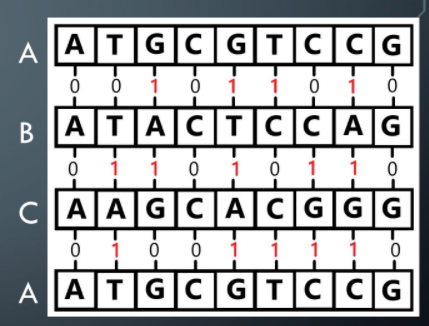

In [4]:
# Finds Hamming distance two strings of equal length
def HammingDistance(x, y): #~
	assert len(x) == len(y), 'sequences must be of equal length'
	counter = 0.0
	for i in range(len(x)):
		if (x[i] != y[i]):
			counter += 1
	return counter


# Find and return the distance betweem the 1st and 2nd sequence

#distance = HammingDistance(sequences['human'], sequences['horse'])

#print("Difference between human and  horse is", distance)


##Tutorial (Day 2) - Creating a dataframe using pandas/numpy

Dataframes provide us with an easy way to store the distances you are calculating. Here is a simple examples of storing data in a dataframe.

Create a dataframe using pandas/numpy with

*   2 columns (Name, Age)
*   3 rows (['Jim', 23], ['Marc' , 19], ['Kia', 20])


In [5]:
#create a numpy array with 2 X 3 = 6 size and reshape it to the rows/columns setting each value to zero
a = np.zeros(6).reshape(3, 2)
cols = ['Name', 'Age']

#use the above to create a panda dataframe
dataset = pd.DataFrame(a, columns=cols)
dataset.iloc[0,0] = 'Jim'
dataset.iloc[0,1] = 23
dataset.iloc[1,0] = 'Marc'
dataset.iloc[1,1] = 19
dataset.iloc[2,0] = 'Kia'
dataset.iloc[2,1] = 20

display(dataset)

,Name,Age
0,Jim,23.0
1,Marc,19.0
2,Kia,20.0


### Step 3 (Day 2)

In this step you will create a dataframe using pandas/numpy where the number of rows and columns is equal to the number of sequence in the dictionary you generated in step 1, i.e. len(dictionary).  The index and columns headers should contains sequence heading names, i.e. headers = sequence.keys()

You can set the values in the table to 0 (np.zeros), as you will calculate distances in the next step.

Hint: You do not need to create a function for this step.

In [6]:
# initialize a dataframe with zero distances and headers
distanceArray = np.zeros((len(sequences), len(sequences)))
headers = sequences.keys()
distancedf = pd.DataFrame(distanceArray, columns=headers, index=headers)


display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,arab_camel,gray_whale
human,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
horse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rh_monkey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chicken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rabbit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pig,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_elp_seal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e_gry_kang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4 (Day 2)

Now you are going to populate the dataframe with the distances between sequences.

To complete this step, you will need to use nested loops to compare every sequence to all other sequences in your dictionary.  Within the inner loop, you will need to call the HammingDistance function that you created in step 2, capturing the return form that function as a variable.  You can then use the location function to store the variable in your dataframe based on the names of the two sequences compared.

HINT: You do not need to create a function for this step.  We have included code to display the dataframe, this will help your check your work.  Do not move the this code into your loop.

In [7]:
#call your distace function and add values to the table
for header1, sequence1 in sequences.items():
    for header2, sequence2 in sequences.items():
        distance = HammingDistance(sequence1, sequence2)
        distancedf.loc[header1, header2] = distance


display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,arab_camel,gray_whale
human,0.0,12.0,10.0,1.0,11.0,13.0,9.0,10.0,12.0,10.0,10.0,10.0
horse,12.0,0.0,3.0,11.0,6.0,11.0,6.0,3.0,7.0,7.0,5.0,5.0
cow,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0
rh_monkey,1.0,11.0,9.0,0.0,10.0,12.0,8.0,9.0,11.0,11.0,9.0,9.0
dog,11.0,6.0,3.0,10.0,0.0,10.0,5.0,3.0,1.0,7.0,3.0,3.0
chicken,13.0,11.0,9.0,12.0,10.0,0.0,8.0,9.0,10.0,12.0,9.0,9.0
rabbit,9.0,6.0,4.0,8.0,5.0,8.0,0.0,4.0,6.0,6.0,2.0,2.0
pig,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0
s_elp_seal,12.0,7.0,4.0,11.0,1.0,10.0,6.0,4.0,0.0,8.0,4.0,4.0
e_gry_kang,10.0,7.0,6.0,11.0,7.0,12.0,6.0,6.0,8.0,0.0,6.0,6.0


### Step 5 (Days 3)

###Create a function to find the minimum distance between two sequence in the matrix 

This is where we start to build our WPGMA tree.  You will need to use the following steps.

Your function will return only the two sequence headers and their actual Hamming distance for the index by column with the smallest value.

How do you do this?  

First, you need create a variable to store the minimum value.  We recomend that you set this to a very high number, because if you set it to zero, it will likely never be repaced.

Second, you will need to use nested loops to navigate your dataframe. Temporarily store the value at each position and use a conditional statement to determine if the value is <= the value currently stored.

Third, you will need to store the index and column header along with the respecitve value in a Tuple.  Hint, you can create a greedy funciton, only storying the "last" smallest value.

Fourth, return the tuple.  Hint, I suggest adding a print statement that will allow you to check your work agains the dataframe you printed in the last step

Note: if two sequence were identical, they would return a Hamming distance of 0.  If your function returns two names and a 0 value, check as it may be correct.

In [19]:
#create definition that finds smallest distance between sequence pairs in the matrix created above
def findMinDistanceSequence(distancedf):
   minvalue = 99999999
   length = len(distancedf.iloc[0])
   for rowname in range(1, length):
     for colhead in range(rowname):
       distance = distancedf.iloc[rowname, colhead]
       if distance <= minvalue: 
         minvalue = distance
         tuple = (distancedf.iloc[rowname].name, distancedf.iloc[colhead].name, distance) 
    
   return tuple






   

#call minimum distance definition
rowhead, colhead, distance = findMinDistanceSequence(distancedf)
print(rowhead, colhead, distance)

gray_whale arab_camel 0.0


### Step 6 (Day 3) 

### Create a function that adds a row and column to the dataframe with the newly "joined" sequence pair identified in the pervious definition

Here you are creating a new column and row, that will contain the distance to joined pair and the remainig sequences

* Distance between the new joined sequences and any other sequence is half (average) distance of the two parent sequences
* To make life easy, you will create and index and column headers in Newick Format - The Newick format represents tree structures using a single string. The keys of leaves sharing a parent are concatenated into strings (separated by commas) and encapsulated by parentheses. eg. (A,B) 

How will you complete this task.

First, you have been provided with code to add and index and column, populating the cells with 0 values

Second, you need to determine the distance between the joined pair and other sequences, dividing by 2.  You need to avoid doing this calculation against the joined pair and one of the parental sequence (eg. "(Horse,Cat)" should not be compared to "Horse" or "Cat") using a conditional statement and pass

Third, you need to add these values to the dataframe

Fourth, return your updated dataframe
  

In [ ]:
def processmindistanceBasic(distancedf, rowhead, colhead, distance):
    #distance returned from definition in step 5
    avgDistance = distance / 2.0
    # Adding the new column and row with 0 distances. Index and column headers returned in step 5
    heading = "(" + colhead + "," + rowhead + ")"
    distancedf[heading] = 0.0

    distancedf.loc[heading] = 0

    distancedf[rowhead][heading] = avgDistance
    distancedf[colhead][heading] = avgDistance
    distancedf[heading][rowhead] = avgDistance
    distancedf[heading][colhead] = avgDistance

    length = len(distancedf.iloc[0])

    for x in range(length): 
      rowheading = distancedf.iloc[x].name
      if rowheading = heading 








    


#call the minimum distance and display the results 
distancedf = processmindistanceBasic(distancedf, rowhead, colhead, distance)
display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,arab_camel,gray_whale,"(arab_camel,gray_whale)"
human,0.0,12.0,10.0,1.0,11.0,13.0,9.0,10.0,12.0,10.0,10.0,10.0,10.0
horse,12.0,0.0,3.0,11.0,6.0,11.0,6.0,3.0,7.0,7.0,5.0,5.0,5.0
cow,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0,2.0
rh_monkey,1.0,11.0,9.0,0.0,10.0,12.0,8.0,9.0,11.0,11.0,9.0,9.0,9.0
dog,11.0,6.0,3.0,10.0,0.0,10.0,5.0,3.0,1.0,7.0,3.0,3.0,3.0
chicken,13.0,11.0,9.0,12.0,10.0,0.0,8.0,9.0,10.0,12.0,9.0,9.0,9.0
rabbit,9.0,6.0,4.0,8.0,5.0,8.0,0.0,4.0,6.0,6.0,2.0,2.0,2.0
pig,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0,2.0
s_elp_seal,12.0,7.0,4.0,11.0,1.0,10.0,6.0,4.0,0.0,8.0,4.0,4.0,4.0
e_gry_kang,10.0,7.0,6.0,11.0,7.0,12.0,6.0,6.0,8.0,0.0,6.0,6.0,6.0


### Step 7 (Day 4) 

### Now you need modify the function created in step 6 to remove parental index and column, for the joined sequences.  

To do this, you only need to add two lines of code, one for the index and one for the column, using the drop function

In [ ]:
#Rewrting the function to also remove rows/columns from the parents
def processmindistance(distancedf, rowhead, colhead, distance):
    avgDistance = distance / 2.0
    # Adding the new column and row with 0 distances
    heading = "(" + colhead + "," + rowhead + ")"
    distancedf[heading] = 0.0

    distancedf.loc[heading] = 0

    distancedf[rowhead][heading] = avgDistance
    distancedf[colhead][heading] = avgDistance
    distancedf[heading][rowhead] = avgDistance
    distancedf[heading][colhead] = avgDistance

















#call the minimum distance and display the results
distancedf = processmindistance(distancedf, rowhead, colhead, distance)
display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,"(arab_camel,gray_whale)"
human,0.0,12.0,10.0,1.0,11.0,13.0,9.0,10.0,12.0,10.0,10.0
horse,12.0,0.0,3.0,11.0,6.0,11.0,6.0,3.0,7.0,7.0,5.0
cow,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0
rh_monkey,1.0,11.0,9.0,0.0,10.0,12.0,8.0,9.0,11.0,11.0,9.0
dog,11.0,6.0,3.0,10.0,0.0,10.0,5.0,3.0,1.0,7.0,3.0
chicken,13.0,11.0,9.0,12.0,10.0,0.0,8.0,9.0,10.0,12.0,9.0
rabbit,9.0,6.0,4.0,8.0,5.0,8.0,0.0,4.0,6.0,6.0,2.0
pig,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0
s_elp_seal,12.0,7.0,4.0,11.0,1.0,10.0,6.0,4.0,0.0,8.0,4.0
e_gry_kang,10.0,7.0,6.0,11.0,7.0,12.0,6.0,6.0,8.0,0.0,6.0


### Step 8 (Day 4) 

### Run the algorithm in loop till you are left with a single row/column.  



In [ ]:
for i in range(len(distancedf.iloc[0])-1):

    #finding minimum distance

    
    #process the minimum distance



### Step 9 (Day 4) 

### Print the tree-string from the header


Bonus: Feed that file to a tree visualizer such as http://etetoolkit.org/treeview/. Put your image in the Text Box below and describe what you see. 

(chicken,((human,rh_monkey),(e_gry_kang,(horse,((dog,s_elp_seal),(rabbit,((arab_camel,gray_whale),(cow,pig))))))))
